# Nick Babcock


## <u>Baseball 2022 Season Statistics Predictor<u/>

<p> The game of baseball is a very statistics driven sport and it is only becoming more analytical as our technology continues to advance and allow us to build better prediction models. There are a lot of different decisions that go into managing the game of baseball, and using analytics to make these decisions is starting to take over the game. Using analytics helps teams develop strategies on how to approach the other team in order to gain a competitive advantage. Given all the statistics that are created in each and every game that's played, there is a lot of data for teams to use at their disposal.
<p> A baseball season consists of 162 games which is about seven months long, and each player's statistics are updated every time they play in a game. In this project, we have built prediction models to predict a player's 2021 final season ending statistics of certain categories. We will do this by evaluating their performance and recorded statistics from previous seasons. These statistics will be used to train our models and ultimately predict the outcome of each players' 2021 season statistics. We will then be able to check against the real values of the 2021 season statistics in order to test and validate the performance of our models.

### <u>Data dictionary for our dataset</u>
<p> This data dictionary is intended to give meaning to each feature that is included in this dataset.

Feature | Description
------- | -----------
Season   | The year of the season the accompanied statistics are from    
Name       | Name of each indivudual player
Team       | Name of the team a player is on
Age | Age of the player in years
PA  | Number of player's plate appearances
AB  | Number of player's at bats
H   | Number of player's hits
HR  | Number of player's home runs
R   | Number of player's runs scored
RBI | Number of player's runs batted
SB  | Number of player's stolen bases
BB% | Percentage of player's at bats resulting in a base-on-balls
K%  | Percentage of player's at bats resulting in a strike out
ISO | Measure of the raw power of a player
BABIP| Player's batting average on balls in play
AVG | Player's batting average
OBP | Player's on base percentage
SLG | Player's slugging percentage
LD% | Player's percentage of line drives per ball where contact was made
GB% | Player's percentage of ground balls per ball where contact was made
FB% | Player's percentage of fly balls per ball where contact was made
IFFB%| Player's percentage of infield fly balls per ball where contact was made
HR/FB| Player's homerun to flyball rate
O-Swing%| Player's percentage of swings at pitches outside the strike zone
Z-Swing%| Player's percentage of swings at pitches inside the strike zone
Swing%| Player's percentage of swings per pitch
O-Contact%| Player's percentage of swings that made contact with the ball on pitches outside the strike zone
Z-Contact%| Player's percentage of swings that made contact with the ball on pitches inside the strike zone
Contact%| Player's percentage of swings that made contact with the ball per swing

### <u>Detailed Explanation of Our Data</u>
<p>PA - Plate appearances / when a player completes their batting turn, regardless of the result.
<p>AB - Any plate appearance that results in a hit, error, fielder's choice, or a non-sacrifice out
<p>H -  A hit occurs when a batter strikes the baseball into fair territory and reaches base without doing so via an error or a fielder's choice.
<p>HR - A home run occurs when a batter hits a fair ball and scores on the play without being put out or without the benefit of an error.
<p>R - A player is awarded a run if he crosses the plate to score his team a run.
<p>RBI - A batter is credited with an RBI in most cases where the result of his plate appearance is a run being scored.
<p>SB - A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled.
<p>BB - A walk (or base on balls) occurs when a pitcher throws four pitches out of the strike zone, none of which are swung at by the hitter.
<p>K -  Percentage of player's at bats resulting in a strike out
<p>ISO - ISO measures the raw power of a hitter by taking only extra-base hits -- and the type of extra-base hit -- into account.
<p>BABIP - BABIP measures a player's batting average exclusively on balls hit into the field of play, removing outcomes not affected by the opposing defense (namely home runs and strikeouts).
<p>AVG - Batting average is determined by dividing a player's hits by his total at-bats for a number between zero (shown as .000) and one (1.000).
<p>OBP - OBP refers to how frequently a batter reaches base per plate appearance. 
<p>SLG - Slugging percentage represents the total number of bases a player records per at-bat.
<p>LD% - Line-drive rate represents the percentage of balls hit into the field of play that are characterized as line drives.
<p>GB% - Ground-ball rate represents the percentage of balls hit into the field of play that are characterized as ground balls. 
<p>FB% - Fly-ball rate represents the percentage of balls hit into the field of play that are characterized as fly balls.
<p>IFFB% - Infield-fly-ball rate represents the percentage of balls hit into the infield that are characterized as fly balls.
<p>HR/FB - Home-run-to-fly-ball rate is the rate at which home runs are hit by a batter for every fly ball he hits. 
<p>O-Swing% - O-Swing% represents the rate of the number of swings at pitches outside the zone per pitches thrown outside the zone
<p>Z-Swing% - Z-Swing% represents the rate of the number of swings at pitches inside the zone per pitches thrown inside the zone
<p>Swing% - Swing% represents the player's rate of swings  per pitch that is thrown
<p>O-Contact% - O-Contact% represents the rate of the number of swings at pitches outside the zone that make contact with the ball per pitches thrown outside the zone
<p>Z-Contact% - Z-Contact% represents the rate of the number of swings at pitches inside the zone that make contact with the ball per pitches thrown inside the zone
<p>Contact% - Contact% represents the rate of the number of swings at pitches that make contact with the ball per swing
    
- This dataset was found on www.fangraphs.com

## <u>Exploratory Data Analysis</u>

In [683]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder, MinMaxScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, precision_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

In [684]:
from google.colab import files
uploaded = files.upload()

Saving battingdata.csv to battingdata (2).csv


In [685]:
import io
df = pd.read_csv(io.BytesIO(uploaded['battingdata.csv']))
df

,Season,Name,Team,Age,AB,PA,H,HR,R,RBI,...,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,Unnamed: 310,Unnamed: 311,Unnamed: 312,Unnamed: 313
0,2016,A.J. Pierzynski,ATL,39,247,259,54,2,15,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,A.J. Pollock,LAD,33,384,422,114,21,53,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,A.J. Pollock,ARI,29,425,466,113,14,73,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,A.J. Pollock,ARI,30,413,460,106,21,61,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,A.J. Pollock,LAD,31,308,342,82,15,49,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,2016,Yunel Escobar,LAA,33,517,567,157,5,68,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,2017,Yunel Escobar,LAA,34,350,381,96,7,43,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1582,2017,Zack Cozart,CIN,31,438,507,130,24,80,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1583,2016,Zack Cozart,CIN,30,464,508,117,16,67,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [686]:
#deleting all columns with 'unamed' name containing null values
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [687]:
df.shape
# df = df.loc[df.Season == 2020, 'Season']
# df = df.loc[data["cases"] != 0]

(1585, 29)

In [688]:
#Here I removed all 2020 data for various reasons. I understand that it would not make sense 
#to delete a year's worth of statistics when predicting a subsequent year's statistics, but
#due to the COVID-19 pandemic, the MLB only played about 1/3 of the amount of games they normally play in a season
#and this would have had too big of an impact our data. For this reason, I decided to omit the year 2020
#and act as if it never happened.
df = df.loc[df.Season != 2020]
print(df.shape)

#checking if values removed
df.loc[df.Season == 2020, 'Season'].count()

(1569, 29)


0

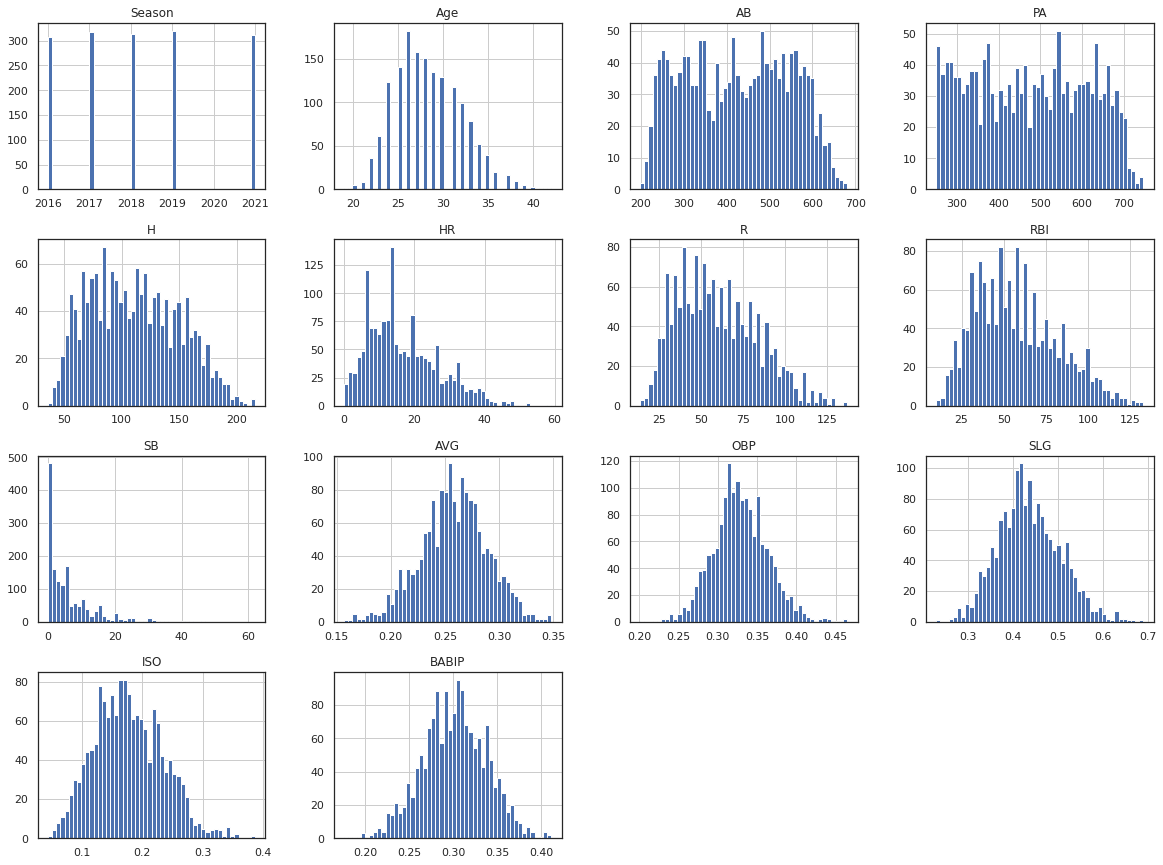

In [689]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [690]:
df2 = df.copy()

In [691]:
#In this step, we are removing the '%' sign from the strings and converting them to
#floats in order to be used as numerical data in our predictions
df2['BB%']=df2['BB%'].str.replace('%', '').astype(float)
df2['K%']=df2['K%'].str.replace('%', '').astype(float)
df2['LD%']=df2['LD%'].str.replace('%', '').astype(float)
df2['GB%']=df2['GB%'].str.replace('%', '').astype(float)
df2['FB%']=df2['FB%'].str.replace('%', '').astype(float)
df2['IFFB%']=df2['IFFB%'].str.replace('%', '').astype(float)
df2['HR/FB']=df2['HR/FB'].str.replace('%', '').astype(float)
df2['O-Swing%']=df2['O-Swing%'].str.replace('%', '').astype(float)
df2['Z-Swing%']=df2['Z-Swing%'].str.replace('%', '').astype(float)
df2['Swing%']=df2['Swing%'].str.replace('%', '').astype(float)
df2['O-Contact%']=df2['O-Contact%'].str.replace('%', '').astype(float)
df2['Z-Contact%']=df2['Z-Contact%'].str.replace('%', '').astype(float)
df2['Contact%']=df2['Contact%'].str.replace('%', '').astype(float)

In [692]:
df2.head()

,Season,Name,Team,Age,AB,PA,H,HR,R,RBI,...,GB%,FB%,IFFB%,HR/FB,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%
0,2016,A.J. Pierzynski,ATL,39,247,259,54,2,15,23,...,50.5,29.5,4.6,3.1,43.9,77.7,58.9,70.1,91.9,82.9
1,2021,A.J. Pollock,LAD,33,384,422,114,21,53,69,...,39.9,38.6,5.1,17.8,37.6,73.9,52.8,61.4,88.1,77.0
2,2017,A.J. Pollock,ARI,29,425,466,113,14,73,49,...,44.6,32.1,12.4,12.4,27.0,60.4,42.3,66.1,92.7,83.6
3,2018,A.J. Pollock,ARI,30,413,460,106,21,61,65,...,42.2,38.4,8.1,17.1,33.6,67.3,48.1,58.4,90.6,77.8
4,2019,A.J. Pollock,LAD,31,308,342,82,15,49,47,...,43.5,36.7,12.6,17.2,31.6,67.0,46.6,54.8,88.7,75.4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


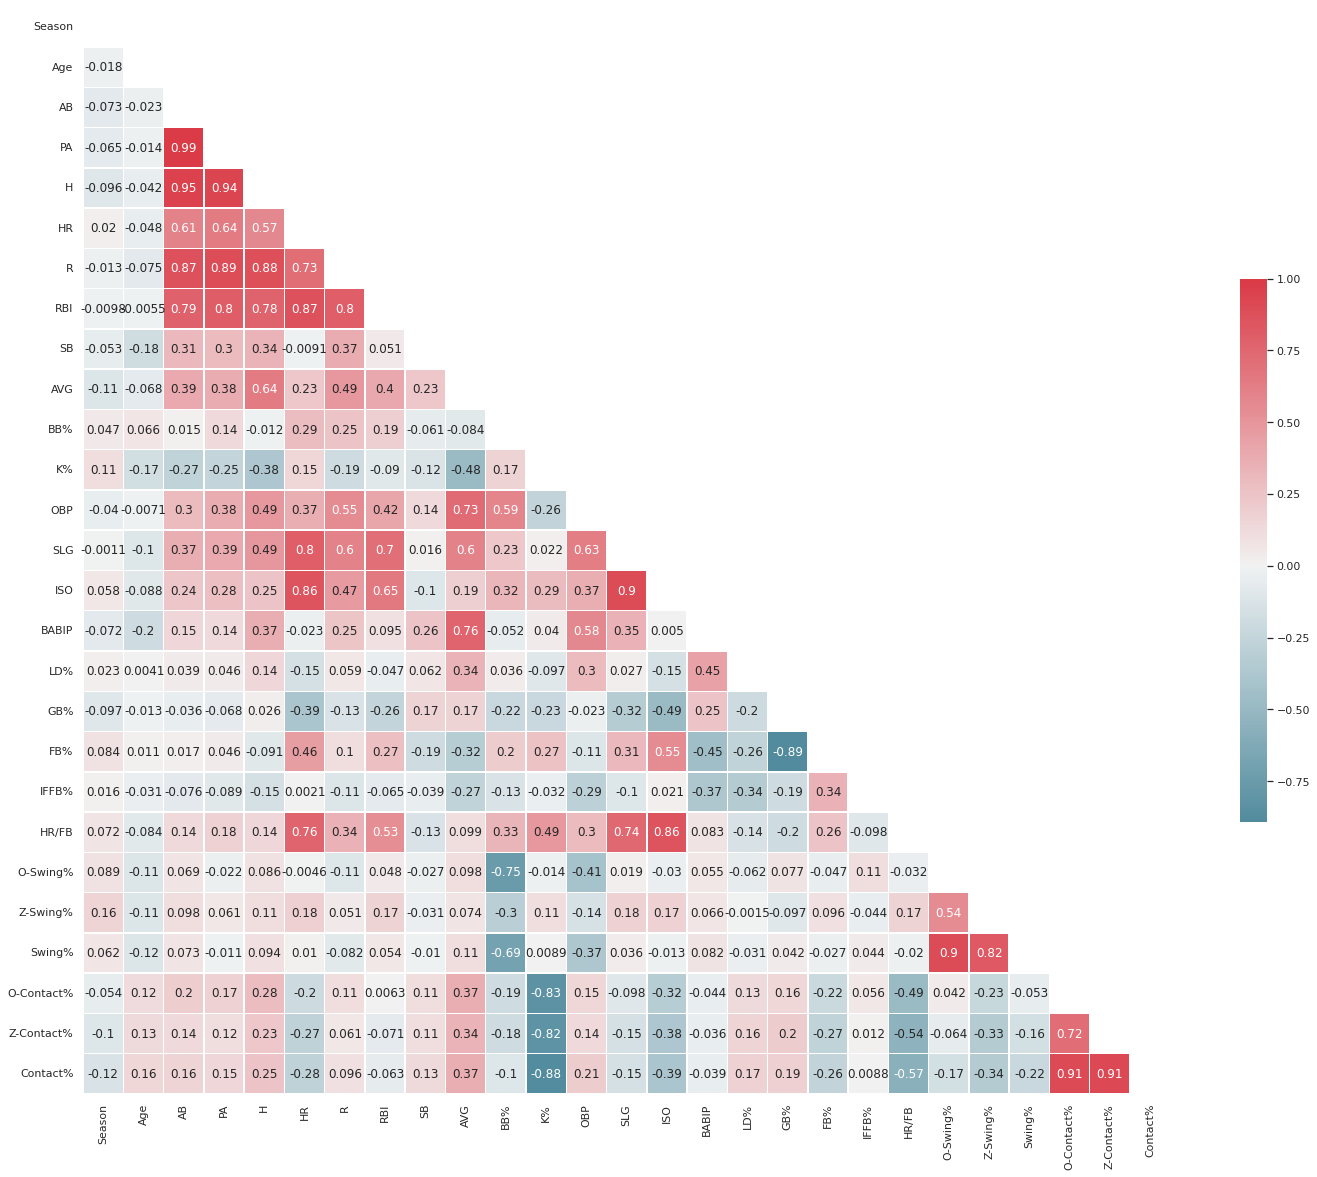

In [693]:
sns.set(style="white")
corr  = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(25, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [694]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df2['Name'] = label.fit_transform(df2['Name'])
df2

,Season,Name,Team,Age,AB,PA,H,HR,R,RBI,...,GB%,FB%,IFFB%,HR/FB,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%
0,2016,0,ATL,39,247,259,54,2,15,23,...,50.5,29.5,4.6,3.1,43.9,77.7,58.9,70.1,91.9,82.9
1,2021,1,LAD,33,384,422,114,21,53,69,...,39.9,38.6,5.1,17.8,37.6,73.9,52.8,61.4,88.1,77.0
2,2017,1,ARI,29,425,466,113,14,73,49,...,44.6,32.1,12.4,12.4,27.0,60.4,42.3,66.1,92.7,83.6
3,2018,1,ARI,30,413,460,106,21,61,65,...,42.2,38.4,8.1,17.1,33.6,67.3,48.1,58.4,90.6,77.8
4,2019,1,LAD,31,308,342,82,15,49,47,...,43.5,36.7,12.6,17.2,31.6,67.0,46.6,54.8,88.7,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,2016,602,LAA,33,517,567,157,5,68,39,...,58.1,20.8,5.3,5.3,27.3,73.0,48.6,65.0,93.4,84.8
1581,2017,602,LAA,34,350,381,96,7,43,31,...,58.2,24.1,2.8,9.7,26.9,69.8,46.9,61.3,91.9,82.6
1582,2017,603,CIN,31,438,507,130,24,80,63,...,38.2,42.3,11.7,15.6,24.4,60.4,40.9,71.2,92.2,85.4
1583,2016,603,CIN,30,464,508,117,16,67,50,...,39.4,39.9,13.1,10.5,28.9,66.4,47.0,65.1,91.6,83.2


In [695]:
#Creating new data frames to separate our data based off of the season (year)
df16 = df2[df2['Season'] == 2016]
df17 = df2[df2['Season'] == 2017]
df18 = df2[df2['Season'] == 2018]
df19 = df2[df2['Season'] == 2019]
df21 = df2[df2['Season'] == 2021]

In [696]:
#all = pd.concat([df16, df17, df18, df19], axis=0)
#all.value_counts()

## <u>Modeling</u>

Now that I have began pre-processing the data, I will begin exploring our options in terms of finding the best ways to make our predictions. Again, I will be making predictions for four different features using three prediction models. The prediction will be of the final value of certain statistics at the end of the 2021 baseball season. I will be checking these predictions against the actual values. The process to making these predictions will go as followed:
- Predict the amount of <b>(A)</b> HR per player in the 2016 season, then predict the amount of HR per player in 2017. Use and combine this data to predict the amount of HR per player in 2018. Then use the data from 2016, 2017, and 2018 to make a prediction for 2019. And finally with these results we will make the prediction for 2021.
- Repeat this process for other features such as <b>(B)</b> OBP (On Base Percentage), <b>(C)</b> RBI (runs batted in), and <b>(D)</b> AVG (batting average).
- The three models I will be using are Linear Regression, XGBoost, and KNN.

## (A) - Home Run Predictions

##### <u> Linear Regression <u/>

In [697]:
#I want to first train our model with the statistics from 2016

y = df16['HR']
X = df16[[ "AB", "PA", "H", "R",
          "RBI", "BB%", "K%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
print(X.shape)
print(y.shape)

(307, 23)
(307,)


In [698]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [699]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [700]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 2.5695361463401336
Score: 0.9513187217518703
Training Score: 0.9544321973812961
Validation Score: 0.9391540287393373


In [701]:
#Now we want evaluate the model but with the model trained from 2016 and see how
#it will perform predicting 2017 statistics
y_test = df17['HR']
X_test = df17[[ "AB", "PA", "H", "R", 
          "RBI", "BB%", "K%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
print(X_test.shape)
print(y_test.shape)
#X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

(318, 23)
(318,)


In [702]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 2.3481307410662184
Score: 0.946543319298551


In [703]:
#Now that we confirmed our model is performing well, it's time to combine 
#the 2016, and 2017 season statistics and retrain the model and then re-check 
#its performance

common = pd.concat([df16,df17])

In [704]:
y = common['HR']
X = common[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(625, 21)
(625,)


In [705]:
#train the model
model = lm.fit(X_train, y_train)

In [706]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 2.1852682895683735
Score: 0.9498782838590387
Training Score: 0.948134406103827
Validation Score: 0.9562974282386347


In [707]:
#The model continues to perform well and we will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['HR']
X_test = df18[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(625, 21)
(625,)


In [708]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 2.083400585891736
Score: 0.9472661954105612


In [709]:
#The model continues to run well and I will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

common2 = pd.concat([df16,df17, df18, df19])
y = common2['HR']
X = common2[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test.shape)
print(y_test.shape)

(313, 21)
(313,)


In [710]:
#train the model again
model = lm.fit(X_train, y_train)

In [711]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 2.412670130432081
Score: 0.9511362588782829
Training Score: 0.9522121728302813
Validation Score: 0.947243525246337


In [712]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['HR']
X_test = df21[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test.shape)
print(y_test.shape)

(311, 21)
(311,)


In [713]:
#Here we will make predictions of the amount of HRs per player
#during the 2021 season
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 2.157458004279824
Score: 0.9552769976623051


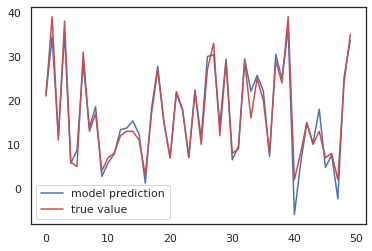

In [714]:
#Now we want to check the values of our predicted HR statistics vs
#the actual recorded values

plt.plot(range(50), predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

- As you can see from the figure above, the consistencies in the model prediction values and the true values of 'HR' prove this linear regression model to be performing extremely well.

#### <u> XGBoost <u/> 

In [715]:
import xgboost as xgb

In [716]:
from pandas.core.common import random_state
# Let's define a KFold for this dataset
kf = KFold(n_splits = 10, shuffle = True, random_state = 12345)

In [717]:
y = df16['HR']
X = df16[[ "AB", "PA", "H", "R", 
          "RBI", "SB", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [718]:
# Define and train base model

base_model = xgb.XGBRegressor()
base_model.fit(X_train, y_train)
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

[01:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation score:  0.9976969292799691


In [719]:
scores = -cross_val_score(base_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Mean cross-validation score: %.2f" % scores.mean())

[01:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 1.59


In [720]:
kf_cv_scores = -cross_val_score(base_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

##### <u> K Nearest Neighbors (KNN) <u/>

In [721]:
y = df16['HR']
X = df16[[ "AB", "PA", "H", "R",
          "RBI", "AVG", "OBP", "BB%","SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [722]:
#K-Nearest Neighbors pipeline
transformer = Pipeline(steps=[('scaler', StandardScaler())])
features = ["AB", "PA", "H", "R",
          "RBI", "AVG", "OBP", "BB%","SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]
preprocessor = ColumnTransformer(transformers=[('scale', transformer, features)])

In [723]:
knn_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regression', KNeighborsRegressor(n_neighbors=5))])

In [724]:
#K-Nearest Neighbors trained algorithm
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 3.332731128398082
KNN Score: 0.9394047518504598


In [725]:
#Now we want to test the data from 2017 with the model that was trained
#using the data from 2016
y_test = df17['HR']
X_test = df17[[ "AB", "PA", "H", "R",
          "RBI", "AVG", "OBP", "BB%","SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

In [726]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 3.332731128398082
KNN Score: 0.9394047518504598


In [727]:
y = common['HR']
X = common[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [728]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 3.021099137731168
KNN Score: 0.935884737208173


In [729]:
#The model continues to perform well and we will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['HR']
X_test = df18[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(625, 22)
(625,)


In [730]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 3.021099137731168
KNN Score: 0.935884737208173


In [731]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

y = common2['HR']
X = common2[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [732]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 2.9008482612712845
KNN Score: 0.947668982682859


In [733]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['HR']
X_test = df21[[ "PA","AB", "H",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG","OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [734]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 2.9008482612712845
KNN Score: 0.947668982682859


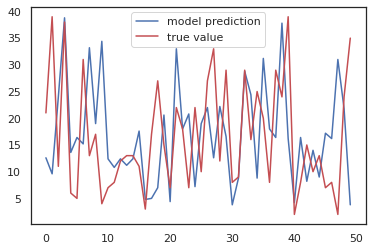

In [735]:
#Now we want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), knn_predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

## (B) - OBP Predictions

##### <u> Linear Regression <u/>

In [736]:
#We want to first train the model with the statistics from 2016

y = df16['OBP']
X = df16[[ "AB", "PA", "H", "R", "HR",
          "RBI", "SB", "BB%", "K%", "ISO", 
         "BABIP", "AVG", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [737]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [738]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.006282059757504577
Score: 0.9718899544098001
Training Score: 0.9722376021086292
Validation Score: 0.966507556780341


In [739]:
#Now we want evaluate our model but from the statistics from 2016 and see how
#it will perform predicting 2017 statistics
y_test = df17['OBP']
X_test = df17[[ "AB", "PA", "H", "R", "HR",
          "RBI", "SB", "BB%", "K%", "ISO", 
         "BABIP", "AVG", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [740]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0054929276556109205
Score: 0.975669639438639


In [741]:
#Now that we confirmed the model is performing well, it's time to combine 
#the 2016, and 2017 season statistics and retrain our model and then re-check 
#its performance

common = pd.concat([df16,df17])

In [742]:
y = common['OBP']
X = common[[ "PA","AB", "H", "HR",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [743]:
#train the model
model = lm.fit(X_train, y_train)

In [744]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.005405686280444051
Score: 0.9743770759730394
Training Score: 0.9745806339907376
Validation Score: 0.9734005484676194


In [745]:
#The model continues to perform well and we will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['OBP']
X_test = df18[[ "PA","AB", "H", "HR",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [746]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.005521475722924536
Score: 0.9752995986751684


In [747]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

common2 = pd.concat([df16,df17, df18, df19])
y = common2['OBP']
X = common2[[ "PA","AB", "H", "HR",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [748]:
#train the model again
model = lm.fit(X_train, y_train)

In [749]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.006639353018947757
Score: 0.9730001298425055
Training Score: 0.9751348766137664
Validation Score: 0.9649231165564489


In [750]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['OBP']
X_test = df21[[ "PA","AB", "H", "HR",
         "R", "RBI", "BB%", "ISO", 
         "BABIP", "AVG", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [751]:
#Here we will make predictions of the amount of HRs per player
#during the 2021 season
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0056137677753976345
Score: 0.973948649198817


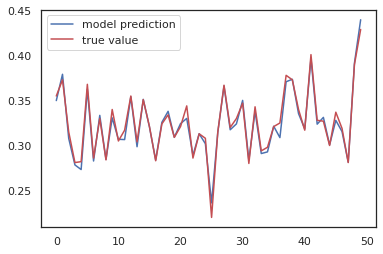

In [752]:
#Now we want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

- As you can see from the figure above, the consistencies in the model prediction values and the true values of 'OBP' prove this linear regression model to be performing extremely well.

##### <u> XGBoost <u/> 

In [753]:
from pandas.core.common import random_state
# Let's define a KFold for this dataset
kf = KFold(n_splits = 10, shuffle = True, random_state = 12345)

In [754]:
y = common2['OBP']
X = common2[[ "AB", "PA", "H", "R", 'HR',
          "RBI", "SB", "BB%", "ISO", 
         "BABIP", "AVG", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [755]:
# Define and train base model

base_model = xgb.XGBRegressor()
base_model.fit(X_train, y_train)
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

[01:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation score:  0.9796002940151267


In [756]:
scores = -cross_val_score(base_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Mean cross-validation score: %.2f" % scores.mean())

[01:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 0.01


In [757]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['OBP']
X_test = df21[[ "AB","PA", "H", 'R', "HR",
          "RBI", "SB", "BB%", "ISO",    
         "BABIP", "AVG", "SLG", "LD%",
         "GB%", "SB", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [758]:
#Here we will make predictions of the OBP per player
#during the 2021 season
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

Validation score:  0.9796002940151267


##### <u> K Nearest Neighbors (KNN) <u/>

In [759]:
y = df16['OBP']
X = df16[[ "AB", "PA", "H", "HR", "R",
          "RBI", "SB", "AVG", "BB%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [760]:
#K-Nearest Neighbors pipeline
transformer = Pipeline(steps=[('scaler', StandardScaler())])
features = ["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "AVG", "BB%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]

preprocessor = ColumnTransformer(transformers=[('scale', transformer, features)])

knn_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regression', KNeighborsRegressor(n_neighbors=5))])

In [761]:
#K-Nearest Neighbors trained algorithm
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.021632815574432734
KNN Score: 0.7760357203729964


In [762]:
#Now we want to test the data from 2017 with the model that was trained
#using the data from 2016
y_test = df17['OBP']
X_test = df17[[ "AB", "PA", "H", "HR", "R",
          "RBI", "SB", "AVG", "BB%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]


In [763]:
#K-Nearest Neighbors trained algorithm
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.021632815574432734
KNN Score: 0.7760357203729964


In [764]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

y = common2['OBP']
X = common2[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "AVG", "BB%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [765]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.017207547255192496
KNN Score: 0.857631304134182


In [766]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['OBP']
X_test = df21[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "AVG", "BB%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

In [767]:

knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.017207547255192496
KNN Score: 0.857631304134182


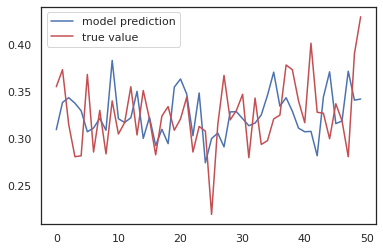

In [768]:
#Now we want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), knn_predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

## (C) - RBI Predictions

##### <u> Linear Regression <u/>

In [769]:
#We want to first train the model with the statistics from 2016

y = df16['RBI']
X = df16[[ "AB", "PA", "H", "R", "HR",
          "SB", "BB%", "K%", "ISO", 
         "BABIP", "AVG", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
         
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [770]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [771]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 10.634029300996133
Score: 0.9054877199935865
Training Score: 0.9208572022288267
Validation Score: 0.8519121800008913


In [772]:
#Now we want evaluate the model but from the statistics from 2016 and see how
#it will perform predicting 2017 statistics
y_test = df17['RBI']
X_test = df17[[ "AB", "PA", "H", "R", "HR",
         "SB", "BB%", "K%", "ISO", 
         "BABIP", "AVG","OBP", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [773]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 8.552269704734366
Score: 0.8816371438042746


In [774]:
#Now that we confirmed the model is performing well, it's time to combine 
#the 2016, and 2017 season statistics and retrain our model and then re-check 
#its performance

common = pd.concat([df16,df17])

In [775]:
y = common['RBI']
X = common[[ "PA","AB", "H", "HR",
         "R", "BB%", "ISO", 
         "BABIP", "AVG", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [776]:
#train the model
model = lm.fit(X_train, y_train)

In [777]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 9.181381942276815
Score: 0.8941367386844692
Training Score: 0.9003377953447491
Validation Score: 0.8690227060121718


In [778]:
#The model continues to perform well and we will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['RBI']
X_test = df18[[ "PA","AB", "H", "HR",
         "R", "BB%", "ISO", 
         "BABIP", "AVG", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [779]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 7.685921285456845
Score: 0.8857081358089591


In [780]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

common2 = pd.concat([df16,df17, df18, df19])
y = common2['RBI']
X = common2[[ "PA","AB", "H", "HR",
         "R", "BB%", "ISO", 
         "BABIP", "AVG", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [781]:
#train the model again
model = lm.fit(X_train, y_train)

In [782]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 8.461612772040638
Score: 0.8926868382143003
Training Score: 0.894424857485709
Validation Score: 0.885589165661532


In [783]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['RBI']
X_test = df21[[ "PA","AB", "H", "HR",
         "R", "BB%", "ISO", 
         "BABIP", "AVG", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [784]:
#Here we will make predictions of the amount of HRs per player
#during the 2021 season
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 7.655396328081596
Score: 0.8981468705391373


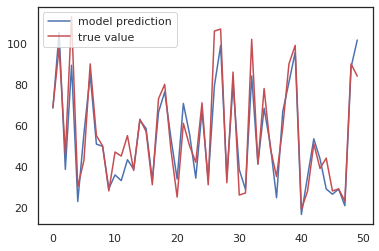

In [785]:
#Now we want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

- As you can see from the figure above, the consistencies in the model prediction values and the true values of 'RBI' prove this linear regression model to be performing extremely well.

##### <u> XGBoost <u/> 

In [786]:
from pandas.core.common import random_state
# Let's define a KFold for this dataset
kf = KFold(n_splits = 10, shuffle = True, random_state = 12345)

In [787]:
y = common2['RBI']
X = common2[[ "AB", "PA", "H", "R", 'HR',
           "SB", "BB%", "ISO", 
         "BABIP", "AVG", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [788]:
# Define and train base model

base_model = xgb.XGBRegressor()
base_model.fit(X_train, y_train)
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

[01:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation score:  0.9415492303416442


In [789]:
scores = -cross_val_score(base_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Mean cross-validation score: %.2f" % scores.mean())

[01:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean cross-validation score: 6.78


In [790]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['RBI']
X_test = df21[[ "AB","PA", "H", 'R', "HR",
           "SB", "BB%", "ISO",    
         "BABIP", "AVG", "SLG", "LD%",
         "GB%", "SB", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [791]:
#Here we will make predictions of the OBP per player
#during the 2021 season
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

Validation score:  0.9415492303416442


##### <u> K Nearest Neighbors (KNN) <u/>

In [792]:
y = df16['RBI']
X = df16[[ "AB", "PA", "H", "R",
          "HR", "SB", "AVG", "OBP", "BB%", "K%","SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [793]:
#K-Nearest Neighbors pipeline
transformer = Pipeline(steps=[('scaler', StandardScaler())])
features = ["AB", "PA", "H", "HR", "R",
         "SB", "AVG", "BB%", "K%", "OBP" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]
preprocessor = ColumnTransformer(transformers=[('scale', transformer, features)])

knn_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regression', KNeighborsRegressor(n_neighbors=5))])

In [794]:
#K-Nearest Neighbors trained algorithm
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 13.445373349822946
KNN Score: 0.9058029192308286


In [795]:
#Now we want to test the data from 2017 with the model that was trained
#using the data from 2016
y_test = df17['RBI']
X_test = df17[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

In [796]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 13.445373349822946
KNN Score: 0.9058029192308286


In [797]:
y = common['RBI']
X = common[["AB", "PA", "H", "HR", "R",
         "SB", "AVG", "BB%", "K%", "OBP" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [798]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 10.869715727653597
KNN Score: 0.8770852413921177


In [799]:
#The model continues to perform well and we will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['RBI']
X_test = df18[["AB", "PA", "H", "HR", "R",
         "SB", "AVG", "BB%", "K%", "OBP" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [800]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 10.869715727653597
KNN Score: 0.8770852413921177


In [801]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

y = common2['RBI']
X = common2[["AB", "PA", "H", "HR", "R",
         "SB", "AVG", "BB%", "K%", "OBP" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [802]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 11.02497165529236
KNN Score: 0.8740324206969534


In [803]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['RBI']
X_test = df21[["AB", "PA", "H", "HR", "R",
         "SB", "AVG", "BB%", "K%", "OBP" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

In [804]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 11.02497165529236
KNN Score: 0.8740324206969534


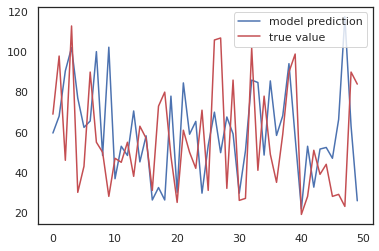

In [805]:
#Now we want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), knn_predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

## (D) - AVG Predictions

##### <u> Linear Regression <u/>

In [806]:
#We want to first train the model with the statistics from 2016

y = df16['AVG']
X = df16[[ "AB", "PA", "H", "R","HR", 
          "RBI", "SB", "BB%", "K%", "ISO", 
         "BABIP", 'OBP', "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [807]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [808]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0004774469311413425
Score: 0.9998009055475924
Training Score: 0.9998061538853127
Validation Score: 0.9997778305436092


In [809]:
#Now I want evaluate the model but from the statistics from 2016 and see how
#it will perform predicting 2017 statistics
y_test = df17['AVG']
X_test = df17[[ "AB", "PA", "H", "R", "HR",
         "RBI", "SB", "BB%", "K%", "ISO", 
         "BABIP","OBP", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [810]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0005294823136046841
Score: 0.9996959301176668


In [811]:
#Now that we confirmed our model is performing well, it's time to combine 
#the 2016, and 2017 season statistics and retrain our model and then re-check 
#its performance

common = pd.concat([df16,df17])

In [812]:
y = common['AVG']
X = common[["AB","PA", "H", "HR", "RBI",
         "R", "BB%", "ISO", 
         "BABIP", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [813]:
#train the model
model = lm.fit(X_train, y_train)

In [814]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0004946787560391376
Score: 0.9997573124735936
Training Score: 0.9997649779637671
Validation Score: 0.9997219469162024


In [815]:
#The model continues to perform well and I will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['AVG']
X_test = df18[[ "AB", "PA", "H", "HR",
         "RBI", "R", "BB%", "ISO", 
         "BABIP", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [816]:
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0005248790009316536
Score: 0.9996794837166149


In [817]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

common2 = pd.concat([df16,df17, df18, df19])
y = common2['AVG']
X = common2[[ "PA","AB", "H", "HR",
         "RBI", "R", "BB%", "ISO", 
         "BABIP", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [818]:
#train the model again
model = lm.fit(X_train, y_train)

In [819]:
predictions = lm.predict(X_val)

SSE = sum((np.array(y_val) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X, y))
print ('Training Score:', model.score(X_train, y_train))
print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.0005347180648489484
Score: 0.999736187911628
Training Score: 0.9997372449956184
Validation Score: 0.9997320690861051


In [820]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['AVG']
X_test = df21[[ "PA","AB", "H", "HR",
         "RBI", "R", "BB%", "ISO", 
         "BABIP", "OBP", "SLG", 
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [821]:
#Here I will make predictions of the amount of HRs per player
#during the 2021 season
predictions = lm.predict(X_test)

SSE = sum((np.array(y_test) - predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(predictions))

print('RMSE:', RMSE)
print ('Score:', model.score(X_test, y_test))
#print ('Training Score:', model.score(X_train, y_train))
#print ('Validation Score:', model.score(X_val, y_val))

RMSE: 0.00048295702083479526
Score: 0.9997627826691191


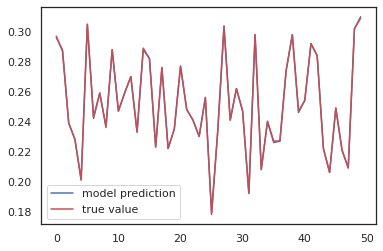

In [822]:
#Now I want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()

- As you can see from the figure above, the consistencies in the model prediction values and the true values of 'AVG' prove this linear regression model to be performing extremely well.

##### <u> XGBoost <u/> 

In [823]:
from pandas.core.common import random_state
# Let's define a KFold for this dataset
kf = KFold(n_splits = 10, shuffle = True, random_state = 12345)

In [824]:
y = common2['AVG']
X = common2[[ "AB", "PA", "H", "R", 'HR',
          "RBI", "SB", "BB%", "ISO", 
         "BABIP", "SLG", 'LD%',
         "GB%", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [825]:
# Define and train base model

base_model = xgb.XGBRegressor()
base_model.fit(X_train, y_train)
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

[01:28:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Validation score:  0.9761075656105923


In [826]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['AVG']
X_test = df21[[ "AB","PA", "H", 'R', "HR",
          "RBI", "SB", "BB%", "ISO",    
         "BABIP", "SLG", "LD%",
         "GB%", "SB", "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%" ]]

In [827]:
#Here I will make predictions of the OBP per player
#during the 2021 season
score = base_model.score(X_train, y_train)   
print("Validation score: ", score) 

Validation score:  0.9761075656105923


##### <u> K Nearest Neighbors (KNN) <u/>

In [828]:
y = df16['AVG']
X = df16[[ "AB", "PA", "H", "R", "HR",
          "RBI", "SB", "OBP", "BB%", "K%","SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [829]:
#K-Nearest Neighbors pipeline
transformer = Pipeline(steps=[('scaler', StandardScaler())])
features = ["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]

preprocessor = ColumnTransformer(transformers=[('scale', transformer, features)])

knn_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regression', KNeighborsRegressor(n_neighbors=5))])

In [830]:
#K-Nearest Neighbors trained algorithm
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.015438326835634456
KNN Score: 0.8343683314758048


In [831]:
#Now we want to test the data from 2017 with the model that was trained
#using the data from 2016
y_test = df17['AVG']
X_test = df17[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

In [832]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.015438326835634456
KNN Score: 0.8343683314758048


In [833]:
y = common['AVG']
X = common[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [834]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.014053702714943129
KNN Score: 0.8630882688614225


In [835]:
#The model continues to perform well and we will confirm one more time by
#evaluating the model with the 2018 season statistics
y_test = df18['AVG']
X_test = df18[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [836]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.014053702714943129
KNN Score: 0.8630882688614225


In [837]:
#The model continues to run well and we will train it one last time
#by adding the 2018 and 2019 statistics to the data and then we will begin to
#predict the 2021 statistics

y = common2['AVG']
X = common2[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [838]:
#train the new model
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.013017564446815085
KNN Score: 0.8834831906545996


In [839]:
#Now that the model is fully trained with the data from 2016-2019, we are ready
#for the original task of predicting the data from 2021

y_test = df21['AVG']
X_test = df21[["AB", "PA", "H", "HR", "R",
          "RBI", "SB", "OBP", "BB%", "K%" ,"SLG",
         "ISO","BABIP", 'LD%', "GB%",
          "FB%", "IFFB%", "HR/FB", "O-Swing%", 
         "Z-Swing%", "Swing%","O-Contact%", "Z-Contact%", "Contact%"]]

In [840]:
knn_pipe.fit(X_train, y_train)
knn_predictions = knn_pipe.predict(X_val)

SSE = sum((np.array(y_val) - knn_predictions)**2)

# compute the RMSE
RMSE = np.sqrt(SSE/len(knn_predictions))

print("RMSE", RMSE)
print ('KNN Score:', knn_pipe.score(X_train, y_train))

RMSE 0.013017564446815085
KNN Score: 0.8834831906545996


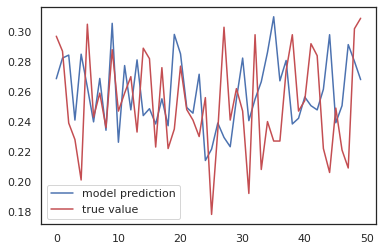

In [841]:
#Now we want to check the values of our predicted OBP statistics vs
#the actual recorded values

plt.plot(range(50), knn_predictions[:50], label='model prediction')
plt.plot(range(50), y_test[:50], 'r', label='true value')
plt.legend()